# Deep Learning

## Vectorization examples

Let's start by importing the required libraries

In [1]:
#importing Libraries
import seaborn as sns
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
import torch.nn.functional as F

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

For flexibility, we can generate a random classification dataset, with two features and 100 examples.

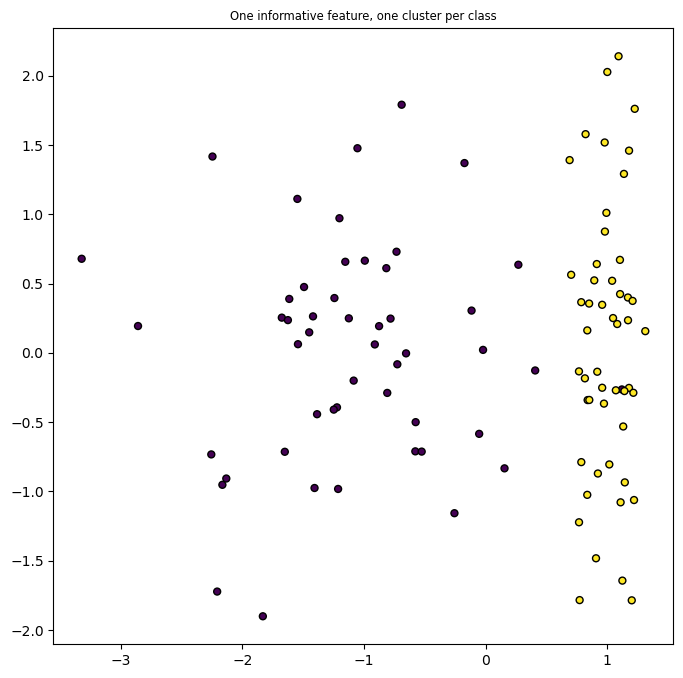

In [2]:
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.datasets import make_gaussian_quantiles

plt.figure(figsize=(8, 8))

plt.title("One informative feature, one cluster per class", fontsize="small")
X1, Y1 = make_classification(
    n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1
)
plt.scatter(X1[:, 0], X1[:, 1], marker="o", c=Y1, s=25, edgecolor="k")


plt.show()

Let's confirm the shape of the examples and the labels.

In [3]:
print(X1.shape)
print(Y1.shape)
print(X1)
print(Y1)

(100, 2)
(100,)
[[ 0.91309282  0.64070989]
 [-0.99348734  0.66513538]
 [ 0.1548198  -0.83310675]
 [ 0.83520017  0.16210932]
 [-1.2433696   0.39549672]
 [-1.38606655 -0.44253163]
 [-1.54788753  1.11069968]
 [-2.85770159  0.19368558]
 [ 0.26854177  0.63573584]
 [ 0.78602823 -0.78825967]
 [-1.15401722  0.65716015]
 [ 0.89248376  0.52289246]
 [-1.67582522  0.25416061]
 [ 1.22513396  1.76067181]
 [-1.45053525  0.14811263]
 [-0.65452429 -0.00360972]
 [ 0.40679872 -0.12701282]
 [-1.22238678 -0.39315769]
 [-2.25542332 -0.73259977]
 [ 0.68990134  1.39064746]
 [ 1.17787784 -0.25293015]
 [-0.87619144  0.19282712]
 [ 0.97812728  1.51778008]
 [ 0.95738117  0.34683144]
 [-1.40676188 -0.97487503]
 [-2.24567248  1.41641613]
 [-1.05408407  1.47634563]
 [ 1.20061384 -1.78528843]
 [ 1.10475636  0.42409191]
 [ 0.97224773 -0.36604181]
 [-0.73302576  0.72964204]
 [ 0.90678945 -1.48193992]
 [ 1.2138137  -0.28792357]
 [-1.54303212  0.06254347]
 [ 1.13046234 -0.53114476]
 [ 0.95757884 -0.25159023]
 [ 1.1690837

To be able to use a PyTorch model, it is necessary to convert the numpy arrays to torch tensors.

In [4]:
# Creating Tensors
X_train=torch.FloatTensor(X1)
y_train=torch.LongTensor(Y1)
print(X_train.shape)
print(y_train.shape)

torch.Size([100, 2])
torch.Size([100])


## Building and training the model

In [5]:
#Creating the Model
class ANN_model(nn.Module):
    def __init__(self,input_features=2,hidden1=20, hidden2=10,out_features=2):
        super().__init__()
        self.f_connected1 = nn.Linear(input_features,hidden1)
        self.f_connected2 = nn.Linear(hidden1,hidden2)
        self.out = nn.Linear(hidden2,out_features)
        
    def forward(self,x):
        x = torch.sigmoid(self.f_connected1(x))
        x = torch.sigmoid(self.f_connected2(x))
        x = self.out(x)
        return x

In [14]:
epochs=500


torch.manual_seed(20)
model = ANN_model()
model.parameters

<bound method Module.parameters of ANN_model(
  (f_connected1): Linear(in_features=2, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=10, bias=True)
  (out): Linear(in_features=10, out_features=2, bias=True)
)>

We have to define the loss function as well as the optimizer.

In [15]:
# Backward Propergation - loss and optimizer
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

Now we can proceed with the training.

The key concept here is the batch size... think about it and experiment with different values.

In [16]:
final_losses=[]
batch_size=1
for epoch in range(epochs):

    # X is a torch Variable
    permutation = torch.randperm(X_train.size()[0])

    for i in range(0,X_train.size()[0], batch_size):
        optimizer.zero_grad()

        indices = permutation[i:i+batch_size]
        batch_x, batch_y = X_train[indices], y_train[indices]

        # in case you wanted a semi-full example
        if epoch==0 and i==0:
            print("===> " + str(batch_x.shape))

        outputs = model.forward(batch_x)
        loss = loss_function(outputs,batch_y)
        final_losses.append(loss)
        if epoch % 100 == 1:
            print("Epoch number: {} and the loss : {}".format(i,loss.item()))


        loss.backward()
        optimizer.step()

===> torch.Size([1, 2])
Epoch number: 0 and the loss : 0.3763670325279236
Epoch number: 1 and the loss : 0.21648231148719788
Epoch number: 2 and the loss : 0.22253167629241943
Epoch number: 3 and the loss : 0.2448779195547104
Epoch number: 4 and the loss : 0.16405655443668365
Epoch number: 5 and the loss : 0.20154781639575958
Epoch number: 6 and the loss : 0.20510947704315186
Epoch number: 7 and the loss : 0.2861316502094269
Epoch number: 8 and the loss : 0.2054056078195572
Epoch number: 9 and the loss : 0.2033279985189438
Epoch number: 10 and the loss : 0.2626955807209015
Epoch number: 11 and the loss : 0.41268035769462585
Epoch number: 12 and the loss : 0.23990455269813538
Epoch number: 13 and the loss : 0.12177160382270813
Epoch number: 14 and the loss : 0.25946545600891113
Epoch number: 15 and the loss : 0.42978325486183167
Epoch number: 16 and the loss : 0.27350884675979614
Epoch number: 17 and the loss : 0.20908096432685852
Epoch number: 18 and the loss : 0.17504407465457916
Epoc

Text(0, 0.5, 'Epochs')

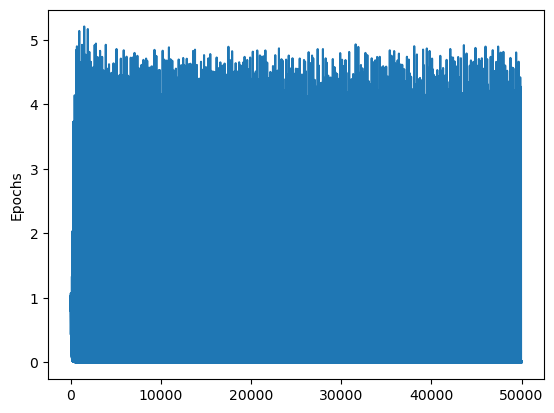

In [17]:
#plot the loss function
final_losses_np = []
for l in final_losses:
    final_losses_np.append(l.detach().numpy())

plt.plot(range(int(epochs*100/batch_size)),final_losses_np)
plt.ylabel('Loss')
plt.ylabel('Epochs')